<a href="https://colab.research.google.com/github/Ankita-da/Logistic-Regression-Assignment/blob/main/Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Theoretical

1. What is Logistic Regression, and how does it differ from Linear Regression?

Answer: Logistic Regression is used for classification tasks (predicting categories like yes/no), while Linear Regression is used for regression (predicting continuous values). Logistic Regression predicts probabilities using a sigmoid function, while Linear Regression predicts real-valued outputs.

2. What is the mathematical equation of Logistic Regression?

Answer:
The general equation is:
P(Y=1 | X) = 1 / (1 + exp(-(β₀ + β₁X₁ + β₂X₂ + ... + βnXn)) )
Where:
P(Y=1 | X): is the probability of Y=1 (the event of interest) given the input features X.
β₀, β₁, β₂, ..., βn: are the coefficients or weights associated with each input feature X₁, X₂, ..., Xn.
X₁, X₂, ..., Xn: are the input features or independent variables.
exp(): is the exponential function (e^x).

3. Why do we use the Sigmoid function in Logistic Regression?

Answer: The sigmoid function maps any real-valued number into a range between 0 and 1, making it suitable for predicting probabilities.

4. What is the cost function of Logistic Regression?

Answer:
Formula:
The Log Loss for a single data point (x, y) is:
-y * log(h(x)) - (1 - y) * log(1 - h(x))
Where:
y is the actual class label (0 or 1)
h(x) is the predicted probability (output of the sigmoid function)


5. What is Regularization in Logistic Regression? Why is it needed?

Answer: Regularization adds a penalty to the cost function to prevent overfitting. It helps the model generalize better to new data.


6. Explain the difference between Lasso, Ridge, and Elastic Net regression.

Answer:

Lasso (L1): Shrinks some coefficients to zero (feature selection).

Ridge (L2): Shrinks coefficients smoothly but none become exactly zero.

Elastic Net: Combines L1 and L2, balancing sparsity and stability.



7. When should we use Elastic Net instead of Lasso or Ridge?

Answer: Use Elastic Net when you have many correlated features and want both feature selection and model stability.


8. What is the impact of the regularization parameter (λ) in Logistic Regression?

Answer: Higher λ increases regularization strength, reducing overfitting but may underfit if too high. Lower λ reduces regularization, risking overfitting.



9. What are the key assumptions of Logistic Regression?

Answer:

The outcome is binary (or multinomial with extensions).

Linear relationship between independent variables and log-odds.

No multicollinearity among predictors.

Independence of observations.

Large sample size for stable estimates.



10. What are some alternatives to Logistic Regression for classification tasks?

Answer:

Decision Trees

Random Forests

Support Vector Machines (SVM)

k-Nearest Neighbors (k-NN)

Naive Bayes

Neural Networks



11. What are Classification Evaluation Metrics?

Answer:

Accuracy

Precision

Recall

F1-Score

ROC-AUC

Confusion Matrix


12. How does class imbalance affect Logistic Regression?

Answer: It can cause the model to favor the majority class, leading to misleading accuracy. Metrics like precision, recall, and F1-score are better in such cases.


13. What is Hyperparameter Tuning in Logistic Regression?

Answer: It involves selecting the best model parameters (like regularization strength, type of penalty, solver) using techniques like grid search or cross-validation.


14. What are different solvers in Logistic Regression? Which one should be used?

Answer:

liblinear: Good for small datasets, supports L1.

saga: Good for large datasets, supports L1 and Elastic Net.

lbfgs: Fast for L2 penalty, best for multiclass.

Choose based on dataset size and regularization type.



15. How is Logistic Regression extended for multiclass classification?

Answer:

One-vs-Rest (OvR): One classifier per class.

Multinomial (Softmax Regression): Single model predicting probabilities across classes.



16. What are the advantages and disadvantages of Logistic Regression?

Answer:
Advantages:

Simple and easy to implement

Works well with linearly separable data

Provides probabilities

Disadvantages:

Assumes linearity in log-odds

Struggles with non-linear relationships

Sensitive to outliers and irrelevant features



17. What are some use cases of Logistic Regression?

Answer:

Email spam detection

Disease diagnosis

Credit scoring

Customer churn prediction

Click-through rate prediction



18. What is the difference between Softmax Regression and Logistic Regression?

Answer:

Logistic Regression: Binary classification.

Softmax Regression: Generalization to multiclass classification by using softmax instead of sigmoid.


19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

Answer:

Use OvR for simplicity or when classes are imbalanced.

Use Softmax for direct multiclass probability estimates and when using solvers that support it.


20. How do we interpret coefficients in Logistic Regression?

Answer:
Each coefficient represents the change in log-odds of the outcome for a one-unit increase in the predictor, holding others constant. Exponentiating the coefficient gives the odds ratio.

In [ ]:
#1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load sample dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression with increased max_iter
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9737


In [ ]:
#2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"L1 Regularization Accuracy: {accuracy_score(y_test, y_pred):.4f}")

L1 Regularization Accuracy: 0.9561


In [ ]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression with L2 regularization
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Output accuracy and coefficients
print(f"L2 Regularization Accuracy: {model.score(X_test_scaled, y_test):.4f}")
print("Coefficients:", model.coef_)

L2 Regularization Accuracy: 0.9737
Coefficients: [[-0.43190368 -0.38732553 -0.39343248 -0.46521006 -0.07166728  0.54016395
  -0.8014581  -1.11980408  0.23611852  0.07592093 -1.26817815  0.18887738
  -0.61058302 -0.9071857  -0.31330675  0.68249145  0.17527452 -0.3112999
   0.50042502  0.61622993 -0.87984024 -1.35060559 -0.58945273 -0.84184594
  -0.54416967  0.01611019 -0.94305313 -0.77821726 -1.20820031 -0.15741387]]


In [ ]:
# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Elastic Net Logistic Regression
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',        # required for elasticnet
    l1_ratio=0.5,         # mix of L1 and L2
    C=1.0,
    max_iter=2000,        # increased from 1000
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print(f"Elastic Net Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Elastic Net Accuracy: 0.9737


In [ ]:
# 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-vs-Rest Logistic Regression
base_model = LogisticRegression(solver='lbfgs', max_iter=1000)
model = OneVsRestClassifier(base_model)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Multiclass OvR Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Multiclass OvR Accuracy: 0.9667


In [ ]:
# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f"Best Parameters: {grid.best_params_}")
print(f"Best Accuracy: {grid.best_score_:.4f}")

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9583


In [ ]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy

from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print(f"Average Stratified K-Fold Accuracy: {scores.mean():.4f}")

Average Stratified K-Fold Accuracy: 0.9667


In [ ]:
from google.colab import files


uploaded = files.upload()

In [ ]:
#8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load CSV

# Convert Medical Expenses into binary classification target

df['High Expense'] = (df['Billing Amount'] > df['Billing Amount'].median()).astype(int)
target_col = 'High Expense'

# Drop irrelevant or non-numeric columns
df = df.drop(['Name', 'Doctor', 'Gender', 'Date of Admission', 'Discharge Date','Insurance Provider'], axis=1)


# Split features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate
accuracy = model.score(X_test_scaled, y_test)
print(f"CSV Dataset Accuracy: {accuracy:.4f}")





KeyError: "['Name', 'Doctor', 'Gender', 'Date of Admission', 'Discharge Date', 'Insurance Provider'] not found in axis"

In [ ]:
# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings

# Optional: Suppress convergence warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Logistic Regression with high iteration limit
model = LogisticRegression(max_iter=5000)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42
)

# Fit model
random_search.fit(X_train_scaled, y_train)

# Output results
print("Best Parameters:", random_search.best_params_)
print(f"Best Accuracy: {random_search.best_score_:.4f}")


Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': np.float64(10.0)}
Best Accuracy: 0.9583


In [ ]:
# 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

from sklearn.multiclass import OneVsOneClassifier

ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
ovo_model.fit(X_train, y_train)

print(f"OvO Accuracy: {ovo_model.score(X_test, y_test):.4f}")

ValueError: could not convert string to float: 'A-'

In [ ]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification

from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

ValueError: could not convert string to float: 'A-'

In [ ]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score

from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

ValueError: could not convert string to float: 'AB+'

In [ ]:
#13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

print(f"Balanced Accuracy: {model.score(X_test, y_test):.4f}")

In [ ]:
#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance

import seaborn as sns

titanic = sns.load_dataset('titanic').dropna(subset=['age', 'embarked', 'sex', 'fare', 'pclass', 'survived'])
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].astype('category').cat.codes

X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print(f"Titanic Dataset Accuracy: {model.score(X_test, y_test):.4f}")

Titanic Dataset Accuracy: 0.7902


In [ ]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_s, y_train)

model_unscaled = LogisticRegression(max_iter=1000)
model_unscaled.fit(X_train, y_train)

print(f"With Scaling: {model_scaled.score(X_test_s, y_test):.4f}")
print(f"Without Scaling: {model_unscaled.score(X_test, y_test):.4f}")

With Scaling: 0.7902
Without Scaling: 0.7902


In [ ]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.8176587301587303


In [ ]:
# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy

model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)

print(f"Custom C=0.5 Accuracy: {model.score(X_test, y_test):.4f}")

Custom C=0.5 Accuracy: 0.7972


In [ ]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients

import numpy as np

model.fit(X_train, y_train)
importance = np.abs(model.coef_[0])
feature_names = X.columns

for name, coef in sorted(zip(feature_names, importance), key=lambda x: -x[1]):
    print(f"{name}: {coef:.4f}")

sex: 2.3640
pclass: 1.2727
embarked: 0.1439
age: 0.0301
fare: 0.0020


In [ ]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score

from sklearn.metrics import cohen_kappa_score

y_pred = model.predict(X_test)
print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred))

Cohen's Kappa Score: 0.5764477581452354


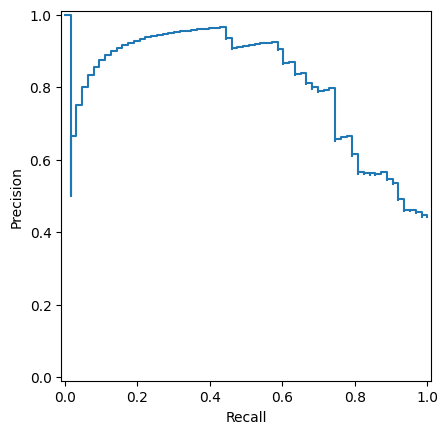

In [ ]:
# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

y_prob = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [ ]:
# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy

solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    print(f"Solver: {solver}, Accuracy: {model.score(X_test, y_test):.4f}")

Solver: liblinear, Accuracy: 0.7832
Solver: saga, Accuracy: 0.6643
Solver: lbfgs, Accuracy: 0.7902
